In [1081]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

We want to explore correlations between the sepal and petal dimensions in three different flowers (Iris-setosa, Iris-versicolor and Iris-virginica) and so we create a dataframe from the csv-file IRIS.csv which contains data about this. 

In [1083]:
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


From the dataframe df we can explore the relation between sepal length and petal length and also between sepal width and petal width by drawing two scatterplots.

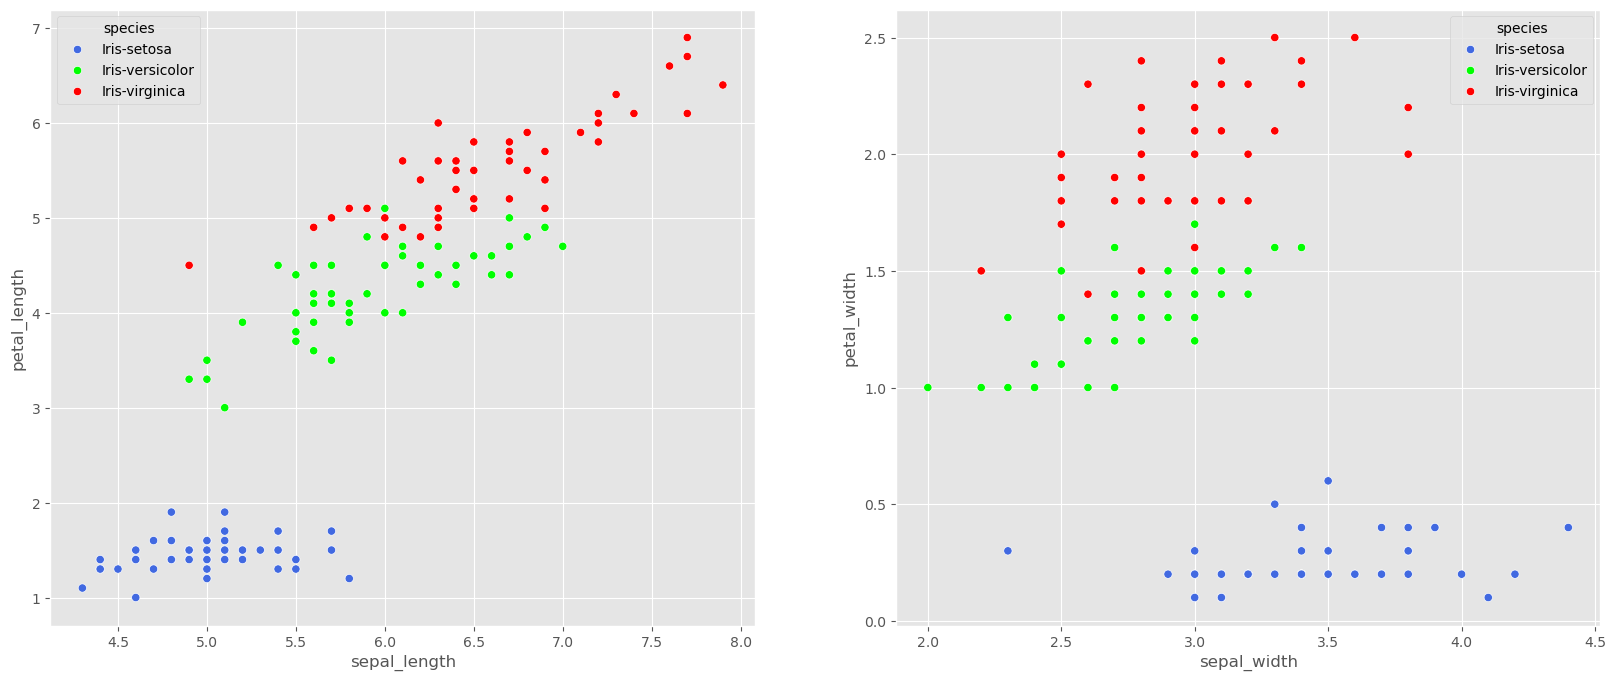

In [1085]:
# Creating a list with hex-code for blue, green, red.
custom_palette = ['#4169E1', '#00ff00', '#FF0000']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(x='sepal_length', y='petal_length', data=df, hue='species', palette = custom_palette, ax=ax1)
sns.scatterplot(x='sepal_width', y='petal_width', data=df, hue='species', palette = custom_palette, ax=ax2)
plt.show()

From the two scatterplots above we can see a positive correlation between petal_length/sepal_length and petal_width/sepal_width for all species. ALthough a much weaker correlation for Iris setosa.

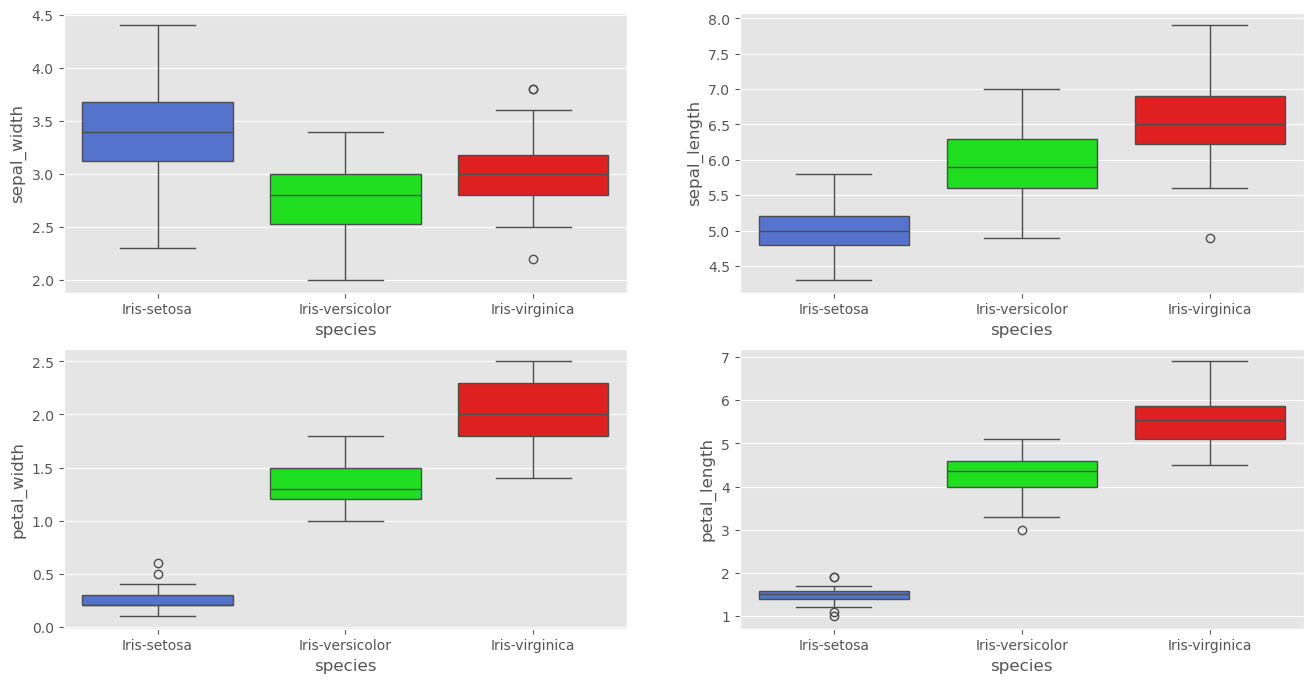

In [1087]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_width', data=df , hue = 'species', palette = custom_palette)

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_length', data=df, hue = 'species', palette = custom_palette)

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_width', data=df, hue = 'species', palette = custom_palette)

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_length', data=df, hue = 'species', palette = custom_palette)
plt.show()

From the boxplot with sepal_width on the vertical axis we see that Iris-setosa has the highest median sepal width and we can see that this width is approximately equal to the biggest sepal width in any Iris-versicolor. For Iris-virginica we see that only one outlier has a sepal width above the upper quartile of Iris-sertosa.

For the boxplots on petal_width and petal_length we instead see that Iris-sertosa is the smallest flower, not even a single flower has a petal width or length that matches the other species.

The boxplot on sepal_length also shows that Iris-setosa is the smallest in general with a median of 5.0 units which is approximately equal to the smallest flowers of Iris-versicolor and Iris-virginica.

In [ ]:
flower_dimensions = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sns.pairplot(df[flower_dimensions], hue='species', palette = custom_palette)
plt.show()

From the pairplot we can look at the relations we still have not looked at. These are the 4 plots in the top right and the 4 plots in the bottom left. But for symmetry reasons we can decide to look at the 4 in the bottom left only. We see barely any correlation for Iris-setosa in any of these plots. 

For the other two species we can see a positive correlation in all plots, with the weakest correlation when comparing width to length.

## Birdwatching

The file artportalen.csv contains data about bird sightings in 2022 from the royal national park. We can analyse this file by putting the data in a dataframe.

In [ ]:
bird_df = pd.read_csv('artportalen.csv')
bird_df

To see which species is the most common we want to add up the number of sightings for each species, but to make sure we don't have duplicates of any row we first check for that.

In [ ]:
bird_df.loc[bird_df.duplicated()]

Since there was no duplicate rows, we can then pick the rows with numeric values in the column "Antal". The datatype of "Antal" can then be converted to int so that we can take the sum of the number of bird sightings in every species.

In [ ]:
bird_prevalence_df = bird_df.loc[bird_df['Antal'].str.isnumeric()]
bird_prevalence_df.loc[:, 'Antal'] = bird_prevalence_df['Antal'].astype(int)
bird_prevalence_df.groupby('Artnamn').sum().sort_values(['Antal'], ascending=False)

Here we can see that the most prevalent species by far is called Grönsiska followed by Sothöna and Gräsand. Three of the rarest species are Ormvråk, Storlok and Spillkråka.

To see the monthly distribution of the top 3 species we can use barplots for each month to compare the number of bird sightings for each of the species. But first we create separate dataframes for the top 3 birds and then concatenate them into one new dataframe. From this dataframe we can create one dataframe for every month of the year 2022 and then group by species and add over it. This gives us the following result:

In [ ]:
grönsiska_df = bird_prevalence_df.query('Artnamn == "Grönsiska"')
sothöna_df = bird_prevalence_df.query('Artnamn == "Sothöna"')
gräsand_df = bird_prevalence_df.query('Artnamn == "Gräsand"')
top3_birds_df = pd.concat([grönsiska_df, sothöna_df, gräsand_df], axis=0)

In [ ]:
top3_birds_df['Startdatum'] = pd.to_datetime(top3_birds_df['Startdatum'], format = '%Y-%m-%d')
top3_birds_jan_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] < '2022-02-01')]
top3_birds_feb_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-02-01') & (top3_birds_df['Startdatum'] < '2022-03-01')]
top3_birds_mar_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-03-01') & (top3_birds_df['Startdatum'] < '2022-04-01')]
top3_birds_apr_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-04-01') & (top3_birds_df['Startdatum'] < '2022-05-01')]
top3_birds_may_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-05-01') & (top3_birds_df['Startdatum'] < '2022-06-01')]
top3_birds_jun_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-06-01') & (top3_birds_df['Startdatum'] < '2022-07-01')]
top3_birds_jul_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-07-01') & (top3_birds_df['Startdatum'] < '2022-08-01')]
top3_birds_aug_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-08-01') & (top3_birds_df['Startdatum'] < '2022-09-01')]
top3_birds_sep_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-09-01') & (top3_birds_df['Startdatum'] < '2022-10-01')]
top3_birds_oct_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-10-01') & (top3_birds_df['Startdatum'] < '2022-11-01')]
top3_birds_nov_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-11-01') & (top3_birds_df['Startdatum'] < '2022-12-01')]
top3_birds_dec_df = top3_birds_df.loc[(top3_birds_df['Startdatum'] >= '2022-12-01')]

In [ ]:
top3_birds_jan_cleaned_df = top3_birds_jan_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_feb_cleaned_df = top3_birds_feb_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_mar_cleaned_df = top3_birds_mar_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_apr_cleaned_df = top3_birds_apr_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_may_cleaned_df = top3_birds_may_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_jun_cleaned_df = top3_birds_jun_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_jul_cleaned_df = top3_birds_jul_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_aug_cleaned_df = top3_birds_aug_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_sep_cleaned_df = top3_birds_sep_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_oct_cleaned_df = top3_birds_oct_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_nov_cleaned_df = top3_birds_nov_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()
top3_birds_dec_cleaned_df = top3_birds_dec_df[['Artnamn', 'Antal']].groupby('Artnamn').sum()

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

axes[0,0].set_title('Bird sightings in January')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_jan_cleaned_df, ax=axes[0,0])

axes[0,1].set_title('Bird sightings in February')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_feb_cleaned_df, ax=axes[0,1])

axes[0,2].set_title('Bird sightings in Mars')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_mar_cleaned_df, ax=axes[0,2])

axes[1,0].set_title('Bird sightings in April')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_apr_cleaned_df, ax=axes[1,0])

axes[1,1].set_title('Bird sightings in May')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_may_cleaned_df, ax=axes[1,1])

axes[1,2].set_title('Bird sightings in June')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_jun_cleaned_df, ax=axes[1,2])

axes[2,0].set_title('Bird sightings in July')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_jul_cleaned_df, ax=axes[2,0])

axes[2,1].set_title('Bird sightings in August')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_aug_cleaned_df, ax=axes[2,1])

axes[2,2].set_title('Bird sightings in September')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_sep_cleaned_df, ax=axes[2,2])

axes[3,0].set_title('Bird sightings in October')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_oct_cleaned_df, ax=axes[3,0])

axes[3,1].set_title('Bird sightings in November')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_nov_cleaned_df, ax=axes[3,1])

axes[3,2].set_title('Bird sightings in December')
sns.barplot(x = 'Artnamn', y = 'Antal', data=top3_birds_dec_cleaned_df, ax=axes[3,2])

plt.show()

One interesting question is: How come Grönsiska spottings is so extremely high in January and then all other months lowest of the top 3 by far. If we look at the highest number of birds spotted at any occasion we can see that 10 000 Grönsiska was reported spotted on 2022-01-09. We can gather more information about this sighting by looking at the comment.

In [ ]:
bird_prevalence_df.sort_values('Antal', ascending=False)

In [ ]:
bird_prevalence_df.loc[1111, 'Kommentar']

We can also look at the comment for the second highest sighting with 3000 Grönsiska spotted.

In [ ]:
bird_prevalence_df.loc[430, 'Kommentar']

From the first comment it seems to be a well estimate and if any an understatement of the number of birds. Second comment also seems to have been counting low, but feels like more insecurity here.

We can also look at the precision of the counting for both sightings.

In [ ]:
bird_prevalence_df.loc[1111, 'Noggrannhet']

In [ ]:
bird_prevalence_df.loc[430, 'Noggrannhet']

All of this tells us that the high number of sightings in January for Grönsiska is likely and for example, no simple misstype in the data with an extra zero.

Another interesting question is which bird has been spotted at the most occasions.

In [ ]:
bird_prevalence_df['Artnamn'].value_counts()

Here we can see that Koltrast is the bird that has been spotted at most separate occasions.

This brings up another question: Why is Koltrast not in the top 3 by total number of birds. We can look at the average group size of Koltrast and compare it with the average group size for the top 3 birds Grönsiska, Sothöna and Gräsand. Since we have already concatenated the dataframes for each of the top 3 birds into one new dataframe we can just take the mean of the column "Antal".

In [ ]:
koltrast_df = bird_prevalence_df.query('Artnamn == "Koltrast"')
koltrast_df['Antal'].mean()

In [ ]:
top3_birds_df['Antal'].mean()

We see that the average group size for the top 3 birds is approximately 7 times bigger than for Koltrast which explains why Koltrast in total numbers is not in top 3.